<a href="https://colab.research.google.com/github/NiteshRaj1012/Nitesh/blob/main/EV_market_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
file_path = '/content/final_dataset.csv.csv'
data = pd.read_csv(file_path)

In [5]:
# Drop the first unnamed column as it seems to be an index column
data = data.drop(columns=['Unnamed: 0'])


In [6]:

# Handle missing values: filling missing values with 0
data = data.fillna(0)

In [7]:
# Selecting relevant features for clustering
features = data.drop(columns=['State Name'])

In [8]:
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [9]:
# Apply KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
# Add the cluster labels to the original dataframe
data['Cluster'] = kmeans.labels_

In [11]:
# Print the resulting clusters
data.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations,Cluster
0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159,0.0,0
1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20,0.0,0
2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947,10.0,0
3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241,9.0,0
4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931,2.0,0


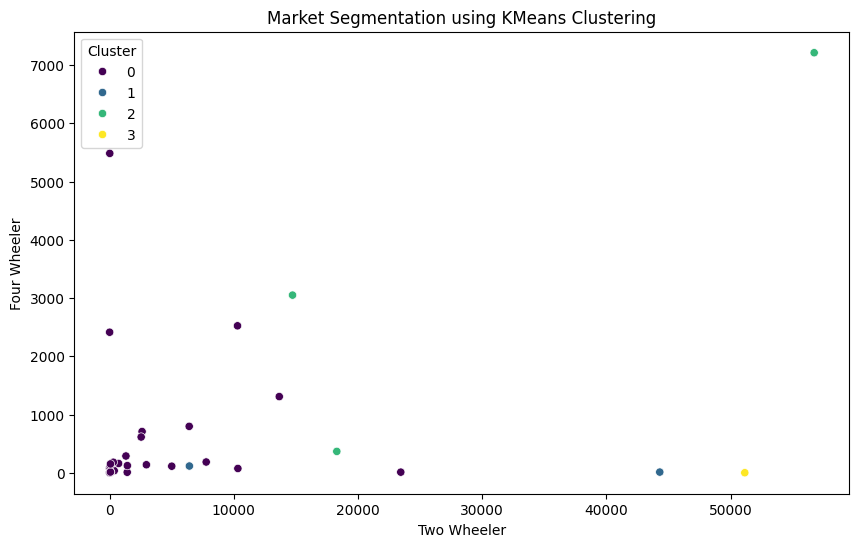

In [12]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Two Wheeler', y='Four Wheeler', hue='Cluster', palette='viridis')
plt.title('Market Segmentation using KMeans Clustering')
plt.xlabel('Two Wheeler')
plt.ylabel('Four Wheeler')
plt.show()
